<a href="https://colab.research.google.com/github/Moro-Afriyie/Cassava-Leaf-Disease-Classifiction-with-InceptionResNetV2/blob/main/cassava_leaf_disease_classification_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cassava Leaf Disease Classification With InceptionResNeV2**

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot  as plt
import cv2
import os
import seaborn as sns
import tensorflow as tf 
import tensorflow_hub as hub
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import itertools  

# **Getting the data ready**

In [ ]:
training_data_path = "../input/cassava-leaf-disease-classification/train.csv"
label_json_data_path  = "../input/cassava-leaf-disease-classification/label_num_to_disease_map.json"
images_data_path = "../input/cassava-leaf-disease-classification/train_images"

In [ ]:
# Checkout the labels of our data

training_data_csv = pd.read_csv(training_data_path)
print(training_data_csv.describe())
training_data_csv.head()

              label
count  21397.000000
mean       2.651914
std        0.988565
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000


,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [ ]:
label_class = pd.read_json(label_json_data_path, orient='index')
label_class = label_class.values.flatten().tolist()
print("Label names :")
for i, label in enumerate(label_class):
    print(f" {i}. {label}")

Label names :
 0. Cassava Bacterial Blight (CBB)
 1. Cassava Brown Streak Disease (CBSD)
 2. Cassava Green Mottle (CGM)
 3. Cassava Mosaic Disease (CMD)
 4. Healthy


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


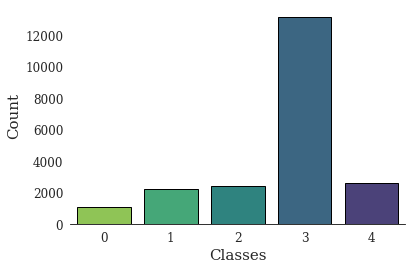

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (6, 4))

for i in ['top', 'right', 'left']:
    ax.spines[i].set_visible(False)
ax.spines['bottom'].set_color('black')

sns.countplot(training_data_csv.label, edgecolor = 'black',
              palette = reversed(sns.color_palette("viridis", 5)))
plt.xlabel('Classes', fontfamily = 'serif', size = 15)
plt.ylabel('Count', fontfamily = 'serif', size = 15)
plt.xticks(fontfamily = 'serif', size = 12)
plt.yticks(fontfamily = 'serif', size = 12)
ax.grid(axis = 'y', linestyle = '--', alpha = 0.9)
plt.show()

# **Cassava Bacterial Blight (CBB)**

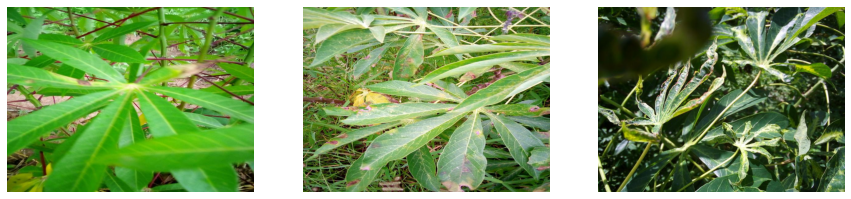

In [ ]:
WORK_DIR = "../input/cassava-leaf-disease-classification/"
sample = training_data_csv[training_data_csv.label == 0].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(WORK_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

# **Cassava Brown Streak Disease (CBSD)**

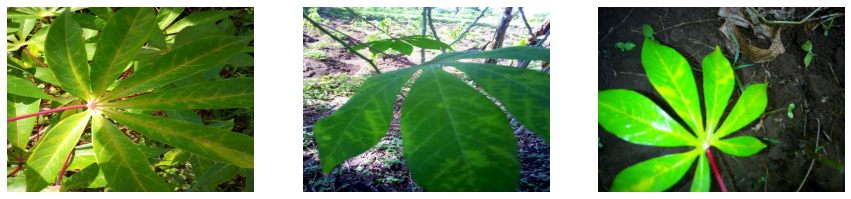

In [ ]:
sample = training_data_csv[training_data_csv.label == 1].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(WORK_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

# **Cassava Green Mottle (CGM)**

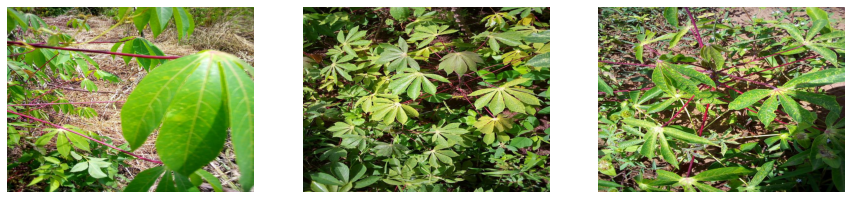

In [ ]:
sample = training_data_csv[training_data_csv.label == 2].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(WORK_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

# **Cassava Mosaic Disease (CMD)**

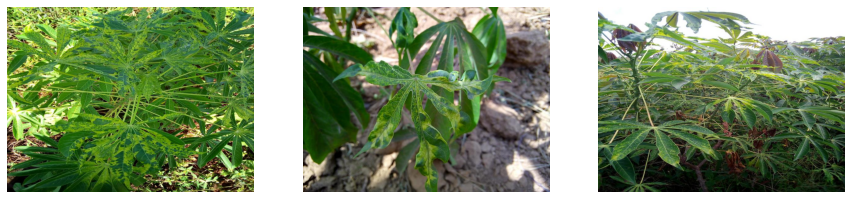

In [ ]:
sample = training_data_csv[training_data_csv.label == 3].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(WORK_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

# **Healthy**

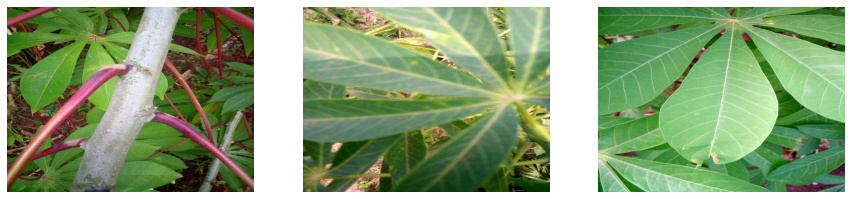

In [ ]:
sample = training_data_csv[training_data_csv.label == 4].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(WORK_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

# **Data Augmentation and Preprocessing**

In [ ]:
batch_size = 16 
img_height = 512
img_width = 512

# **Splitting the Data into Training and Validation Sets**

**used 80% as the training set and used 20% as the validation set**

In [ ]:
# Data agumentation and pre-processing using tensorflow
training_generator = ImageDataGenerator(
                              rotation_range=270,
                              width_shift_range=0.3,
                              height_shift_range=0.3,
                              brightness_range=[0.1,0.9],
                              shear_range=20,
                              zoom_range=0.35,
                              channel_shift_range=0.1,
                              horizontal_flip=True,
                              vertical_flip=True,
                              rescale=1/255,
                              validation_split=0.2
                               )
                                    
    
validation_generator = ImageDataGenerator(rescale=1/255,
                               validation_split = 0.2
                              )

In [ ]:
training_data_csv['label'] = training_data_csv['label'].astype('string')

training_set_generator = training_generator.flow_from_dataframe(
                            dataframe=training_data_csv,
                            directory = images_data_path,
                            x_col = "image_id",
                            y_col = "label",
                            target_size = (img_height, img_width),
                            class_mode = "categorical",
                            batch_size = batch_size,
                            shuffle = True,
                            subset = "training",

)

validation_set_generator = validation_generator.flow_from_dataframe(
                            dataframe=training_data_csv,
                            directory = images_data_path,
                            x_col = "image_id",
                            y_col = "label",
                            target_size = (img_height, img_width),
                            class_mode = "categorical",
                            batch_size = batch_size,
                            shuffle = False,
                            subset = "validation"
)

Found 17118 validated image filenames belonging to 5 classes.
Found 4279 validated image filenames belonging to 5 classes.


# **Visualizing the preprocessed Data**

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


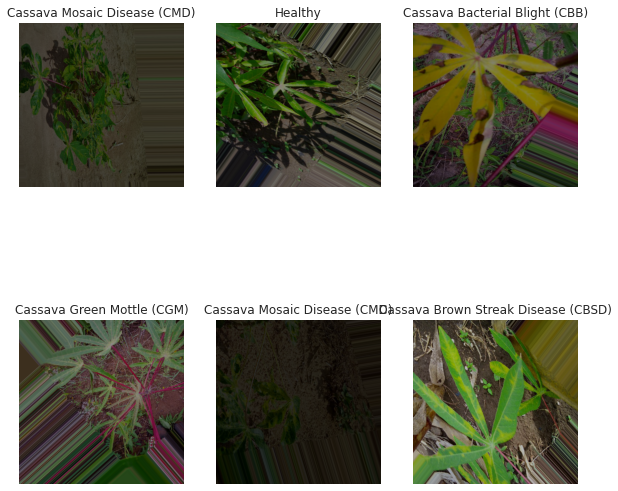

In [ ]:
# visualizing data
images, labels = next(training_set_generator)


plt.figure(figsize=(10,10))
for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(2,3, i%6 +1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(label_class[np.argmax(label)])
    
    if i==30:
        break

#  **Building The Model**

# **InceptionResNetV2 Model**

In [ ]:
#Loading the InceptionResNetV2 architecture with imagenet weights as base
base = applications.InceptionResNetV2(include_top=False, weights='imagenet',input_shape=[img_height,img_width,3])
model = tf.keras.Sequential([
    base,
    tf.keras.layers.BatchNormalization(renorm=True),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  
    ])
  
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.9),
              metrics=['accuracy'])


model.summary()


219062272/219055592 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 14, 14, 1536)      54336736  
_________________________________________________________________
batch_normalization_203 (Bat (None, 14, 14, 1536)      10752     
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               786944    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_______________________________________________________

# **Visualizing The Model Architecture**

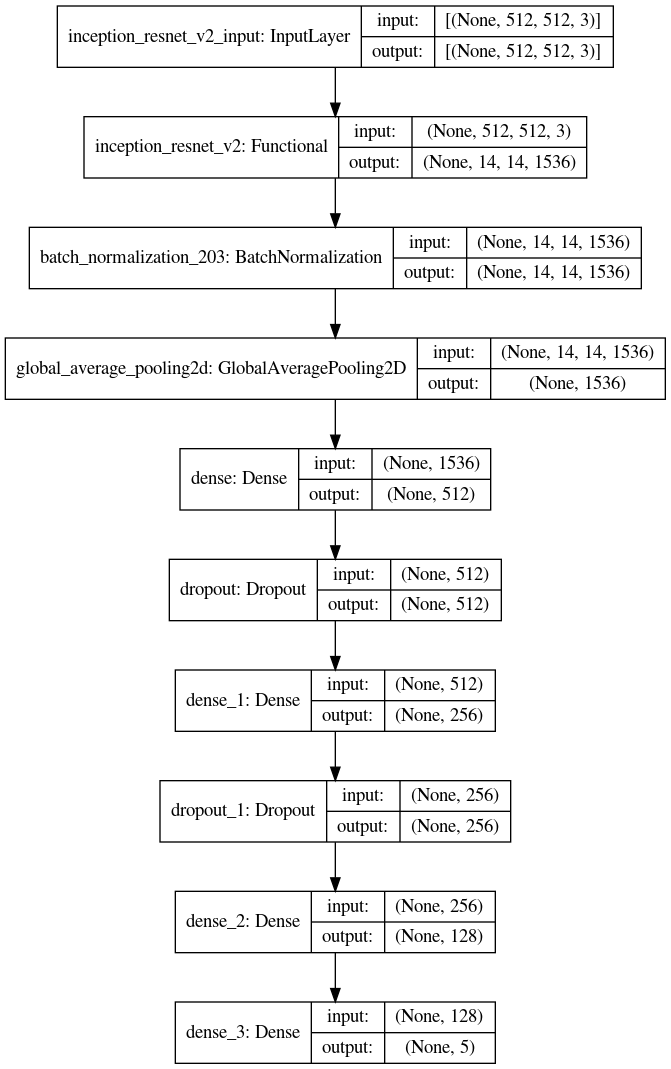

In [ ]:
model_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=model_img_file, show_shapes=True)

# Creating Callbacks

In [ ]:
epochs = 15

# Reduce learning rate when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.01,
                                                 patience = 3,
                                                 factor = 0.5,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 0.00000001)

# Stop the training process when there is a change lesser than <min_delta> in <val_accuracy> for more than <patience> epochs
early_stopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 mode = 'max',
                                                 min_delta = 0.005,
                                                 patience = 10,
                                                 verbose = 1,
                                                 restore_best_weights = True)

# **Training The Model**

In [ ]:
history = model.fit(training_set_generator,
                    validation_data=validation_set_generator, 
                    epochs=epochs, callbacks=[reduce_lr, early_stopper])

Epoch 1/15
1070/1070 [==============================] - 2050s 2s/step - loss: 0.8679 - accuracy: 0.6818 - val_loss: 0.6972 - val_accuracy: 0.8320
Epoch 2/15
1070/1070 [==============================] - 1945s 2s/step - loss: 0.5303 - accuracy: 0.8188 - val_loss: 0.4572 - val_accuracy: 0.8364
Epoch 3/15
1070/1070 [==============================] - 1947s 2s/step - loss: 0.4734 - accuracy: 0.8368 - val_loss: 0.4648 - val_accuracy: 0.8448
Epoch 4/15
1070/1070 [==============================] - 1962s 2s/step - loss: 0.4338 - accuracy: 0.8513 - val_loss: 0.4267 - val_accuracy: 0.8591
Epoch 5/15
1070/1070 [==============================] - 2183s 2s/step - loss: 0.4095 - accuracy: 0.8633 - val_loss: 0.6807 - val_accuracy: 0.7700
Epoch 6/15
1070/1070 [==============================] - 2222s 2s/step - loss: 0.4021 - accuracy: 0.8617 - val_loss: 0.3913 - val_accuracy: 0.8698
Epoch 7/15
1070/1070 [==============================] - 2145s 2s/step - loss: 0.3820 - accuracy: 0.8733 - val_loss: 0.4231 -

In [ ]:
#save the history object to a csv file so we can access it
import pandas as pd

pd.DataFrame.from_dict(history.history).to_csv('history.csv',index=False)

# **Visualizing The Performance of the Model**

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy: 0.9083421230316162\nValidation Accuracy: 0.883617639541626')

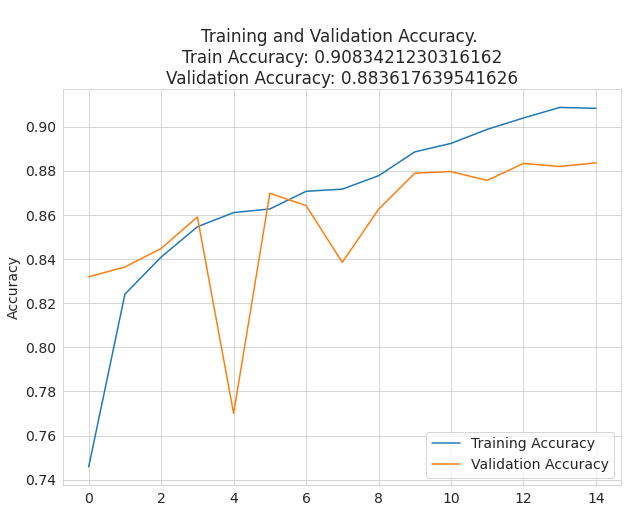

In [ ]:
#get results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


#plot results
#accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')

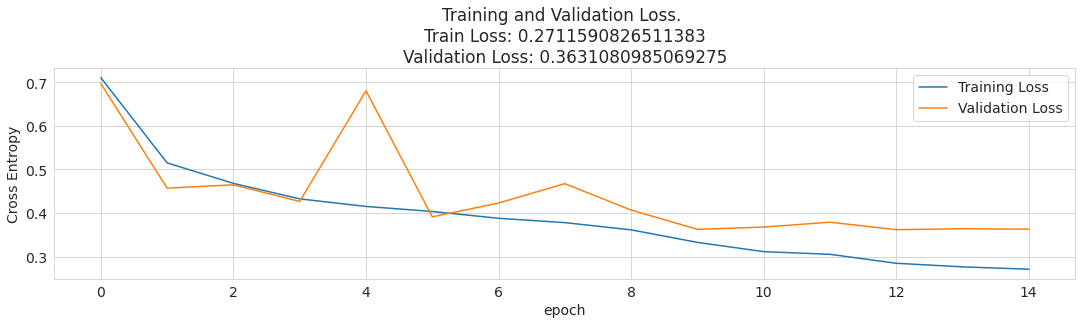

In [ ]:
#loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()

# **Evaluating the Accuracy of the model**

In [ ]:
#Get the accuracy score

accuracy_score = model.evaluate(validation_set_generator)


print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100)) 

print("Loss: ",accuracy_score[0])

268/268 [==============================] - 98s 366ms/step - loss: 0.3631 - accuracy: 0.8836
[0.3631080985069275, 0.883617639541626]
Accuracy: 88.3618%
Loss:  0.3631080985069275


# **Visualising the model's performance using confusion matrix**

In [ ]:
#making predictions with the model

Y_pred = model.predict(validation_set_generator)

y_pred = np.argmax(Y_pred, axis=1)



Text(83.0, 0.5, 'True Label')

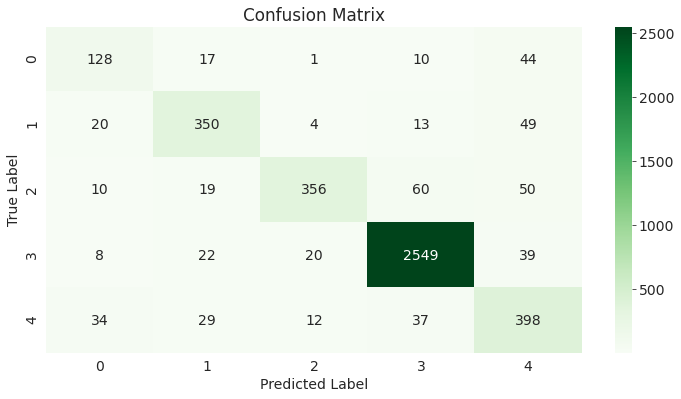

In [ ]:

fig, ax = plt.subplots(figsize=(12,6))  
sns.heatmap(confusion_matrix(validation_set_generator.classes, y_pred),
            annot=True, fmt="d", cmap='Greens',
           ax = ax)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# **Classification Report**

In [ ]:
print(classification_report(validation_set_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       200
           1       0.80      0.80      0.80       436
           2       0.91      0.72      0.80       495
           3       0.96      0.97      0.96      2638
           4       0.69      0.78      0.73       510

    accuracy                           0.88      4279
   macro avg       0.80      0.78      0.79      4279
weighted avg       0.89      0.88      0.88      4279



# **Making Predictions on the test data**

In [ ]:
test_path = "../input/cassava-leaf-disease-classification/test_images"


# **Viewing the Test Image**

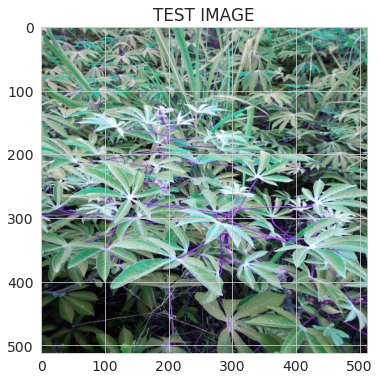

In [ ]:
import cv2

test_img_path = test_path+"/2216849948.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (img_height, img_width)).reshape(-1, img_height, img_width, 3)/255

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])

In [ ]:
predictions = []
sample_submission = pd.read_csv("../input/cassava-leaf-disease-classification/sample_submission.csv")

for image in sample_submission.image_id:
    img = tf.keras.preprocessing.image.load_img(test_path +'/'+ image)
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (img_height, img_width))
    img = tf.reshape(img, (-1, img_height, img_width, 3))
    prediction = model.predict(img/255)
    predictions.append(np.argmax(prediction))

my_submission = pd.DataFrame({'image_id': sample_submission.image_id, 'label':  predictions})
my_submission.to_csv('submission.csv', index=False) 

In [ ]:
# # Submission file ouput
print("Submission File: \n---------------\n")
print(my_submission.head()) # Predicted Output

Submission File: 
---------------

         image_id  label
0  2216849948.jpg      4
